<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU"  />

    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** Rafael Juarez Badillo Chavez, Javier Alejandro Contreras Figueroa

**Fecha:** 05 de febrero del 2024.

**Expediente** : 733240
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/RafaJBZ/Tarea_2_RAJuarez_JAFigueroa

**Link Github Frok**: https://github.com/JavierFigueroa21/Tarea_2_RAJuarez_JAFigueroa


## Enunciado de tarea.
> Para ejemplo estudiado en esta clase data WWWUsage.csv probar lo siguiente:
1. Encontrar el mejor modelo ARIMA usando los criterios de AIC, BIC y log-verosimilitud, justificando la estructura propuesta.
2. Analizar el efecto de normalizar la serie de tiempo, es decir usar MinMaxScaler para normalizar los datos. Posterior a esto, realizar el mismo procedimiento realizado en clase y encontrar el mejor modelo de ARIMA. Justifique todos los análisis, incluyendo los resultados de las gráficas de ACF y PAC.
3. Investigar la implementación y teoría de los modelos SARIMAX. Además de eso, generar un modelo de pronóstico usando SARIMAX, donde todo el procedimiento anteriormente descrito es implementado, para el siguiente conjunto de datos con estacionalidad.
4. Realizar una predicción de 20 unidades de tiempo en el futuro, tanto para el modelo ARIMA como SARIMA y reportar los resultados en una gráfica donde se puedan observar los datos reales y los datos predichos,

In [4]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

warnings.filterwarnings("ignore")
plt.rc("font", size=12)

In [5]:
data = pd.read_csv(r'WWWusage.csv', names=[ 'values'], header=0)
data.index = data.index.droplevel()
data

,values
1,88
2,84
3,85
4,85
5,84
...,...
96,222
97,228
98,226
99,222


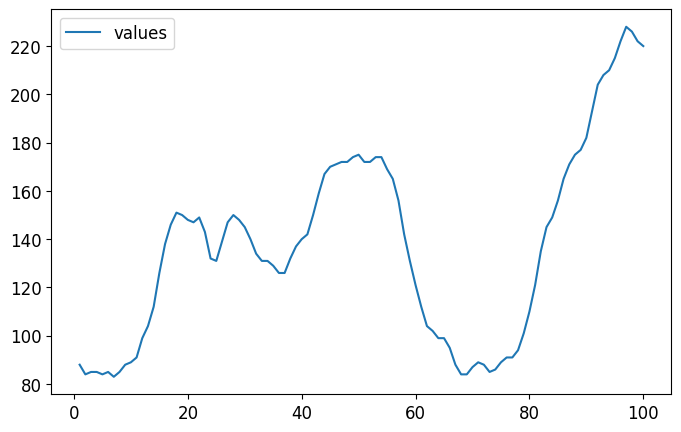

In [6]:
data.plot(figsize=(8,5))
plt.show()

In [7]:
# Función ADF
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

    if (dftest[1] <= 0.05) & (dftest[4]['5%'] > dftest[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [8]:
#Graficar ACF y PACF
def plot_acf_pacf(data, kwargs=dict()):
    f = plt.figure(figsize=(8,5))

    ax1 = f.add_subplot(121)

    plot_acf(data, zero=False, ax=ax1, **kwargs)

    ax2 = f.add_subplot(122)
    plot_pacf(data, zero=False, ax=ax2, method='ols', **kwargs)

    plt.show()

### Código de solución estudiante 1 Rafael Juarez Badillo

-----------------------------------------------------------------
##1️⃣

In [9]:
# Código de solución estudiante 1
# Dividimos los datos
train = data.iloc[:80]
test = data.iloc[80:]
train.shape, test.shape

((80, 1), (20, 1))

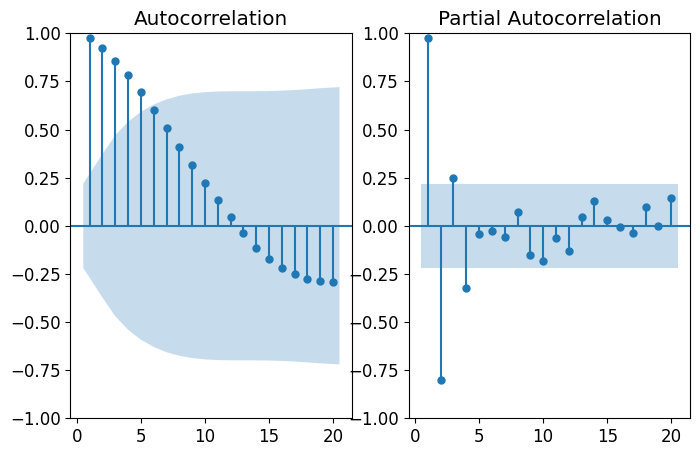

In [10]:
# Graficamos
plot_acf_pacf(train)

In [11]:
adf_test(train)

Results of Dickey-Fuller Test:
Test Statistic                 -2.649346
p-value                         0.083221
#Lags Used                      3.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64
Non-stationary


Vemos que no es estacionaria, diferenciemos para ver si podemos lograr que funcione

In [12]:
diff1_values = train.diff().dropna()

print('ADF para derivada primer orden...\n')
adf_test(diff1_values)

diff2_values = train.diff().diff().dropna()

print('ADF para derivada segundo orden...\n')
adf_test(diff2_values)

ADF para derivada primer orden...

Results of Dickey-Fuller Test:
Test Statistic                 -2.504537
p-value                         0.114374
#Lags Used                      2.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64
Non-stationary
ADF para derivada segundo orden...

Results of Dickey-Fuller Test:
Test Statistic                -8.236551e+00
p-value                        5.869012e-13
#Lags Used                     1.000000e+00
Number of Observations Used    7.600000e+01
Critical Value (1%)           -3.519481e+00
Critical Value (5%)           -2.900395e+00
Critical Value (10%)          -2.587498e+00
dtype: float64
Stationary


**Prodria ser posible trabajar con las dos, pero cual funcionara mejor?**

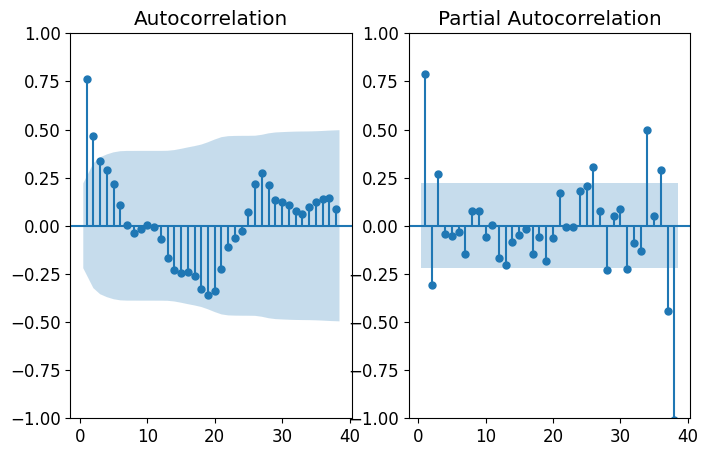

In [13]:
plot_acf_pacf(diff1_values, {'lags':38})

ARIMA(p=3, d=1, q=0)

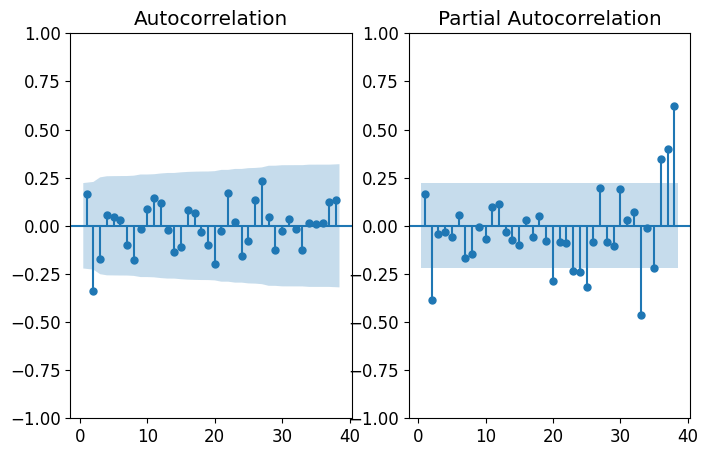

In [14]:
plot_acf_pacf(diff2_values, {'lags':38})

ARIMA(p=2, d=2, q=2)

In [15]:
# 1. Modelo de diferencia de primer orden
arima_model1 = ARIMA(train, order=(3, 1, 0))
model1 = arima_model1.fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                   80
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -202.280
Date:                Mon, 05 Feb 2024   AIC                            412.560
Time:                        11:42:57   BIC                            422.038
Sample:                             0   HQIC                           416.357
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1057      0.110     10.037      0.000       0.890       1.322
ar.L2         -0.5786      0.140     -4.141      0.000      -0.852      -0.305
ar.L3          0.2645      0.107      2.470      0.0

In [16]:
# 2. Modelo de diferencia de segundo orden

# Basado en lo discutido anteriormente, necesitamos sólo considerar algunos términos AR y MA.
# Para ello definimos sus coeficientos cómo la especificación de polinomios

# Términos de AR
ar = (0, 1)  # (alpha1, alpha2)
# Términos de MA
ma = (0, 1)  # (beta1, beta2)

arima_model2 = ARIMA(train, order=(ar, 2, ma))
model2 = arima_model2.fit()
print(model2.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                   80
Model:             ARIMA([2], 2, [2])   Log Likelihood                -204.918
Date:                Mon, 05 Feb 2024   AIC                            415.836
Time:                        11:43:06   BIC                            422.906
Sample:                             0   HQIC                           418.666
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L2         -0.1580      0.299     -0.528      0.598      -0.744       0.428
ma.L2         -0.2139      0.299     -0.716      0.474      -0.799       0.372
sigma2        11.1660      2.019      5.531      0.0

Parece que la mejor es la primera, ya que la log likelihood es mayor y el AIC y BIC son mas chicos

<Axes: >

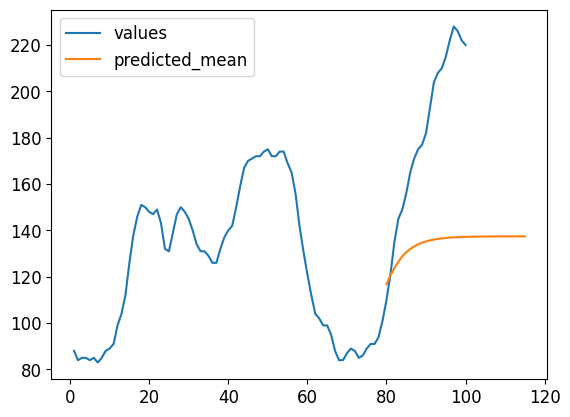

In [17]:
# Cómo realizar predicciones con el modelo ajustado
y_h = model1.predict(start=80, end=115, dynamic=False).to_frame()

ax = data.plot()

y_h.plot(ax=ax)

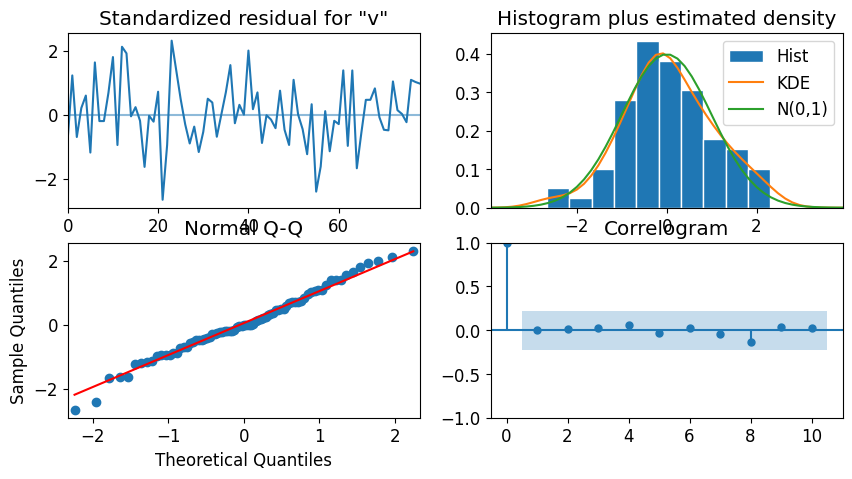

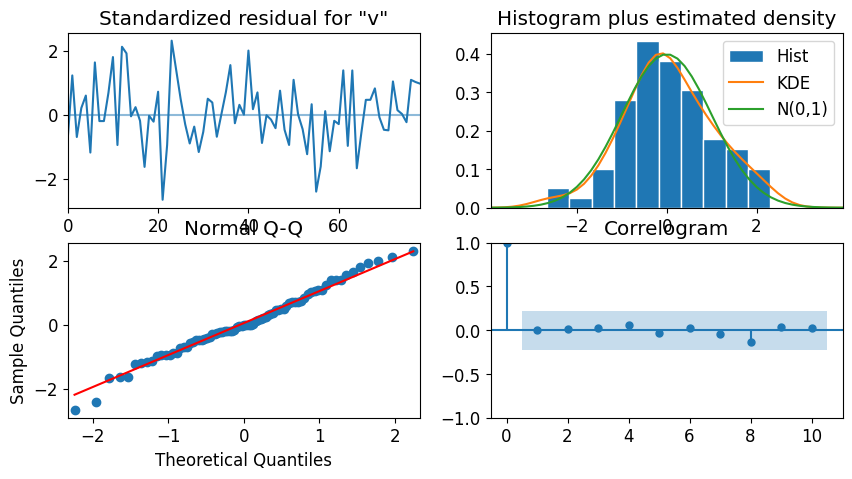

In [19]:
# Gráfico de los diagnósticos para los residuos
model1.plot_diagnostics(figsize = (10, 5))

----
## ✌️

In [21]:
# Normalización
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(train)
scaled_data =  pd.DataFrame(scaled_data, columns=['values'])
scaled_data.index += 1

,values
1,0.054348
2,0.010870
3,0.021739
4,0.021739
5,0.010870
...,...
76,0.086957
77,0.086957
78,0.119565
79,0.195652


In [22]:
adf_test(scaled_data)

Results of Dickey-Fuller Test:
Test Statistic                 -2.649346
p-value                         0.083221
#Lags Used                      3.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64
Non-stationary


Parece que ni escalados son estacionarios, diferenciemos

In [23]:
diff1_values = scaled_data.diff().dropna()

print('ADF para derivada primer orden...\n')
adf_test(diff1_values)

diff2_values = scaled_data.diff().diff().dropna()

print('ADF para derivada segundo orden...\n')
adf_test(diff2_values)

ADF para derivada primer orden...

Results of Dickey-Fuller Test:
Test Statistic                 -2.504537
p-value                         0.114374
#Lags Used                      2.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64
Non-stationary
ADF para derivada segundo orden...

Results of Dickey-Fuller Test:
Test Statistic                -8.236551e+00
p-value                        5.869012e-13
#Lags Used                     1.000000e+00
Number of Observations Used    7.600000e+01
Critical Value (1%)           -3.519481e+00
Critical Value (5%)           -2.900395e+00
Critical Value (10%)          -2.587498e+00
dtype: float64
Stationary


Ahora grafiquemos para las dos

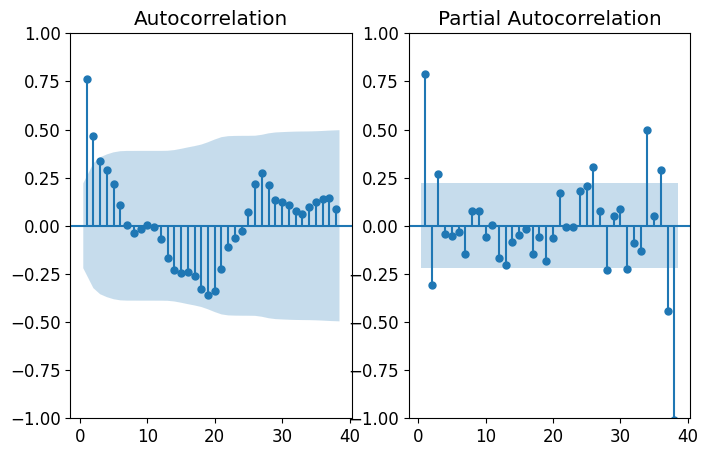

In [24]:
plot_acf_pacf(diff1_values, {'lags':38})

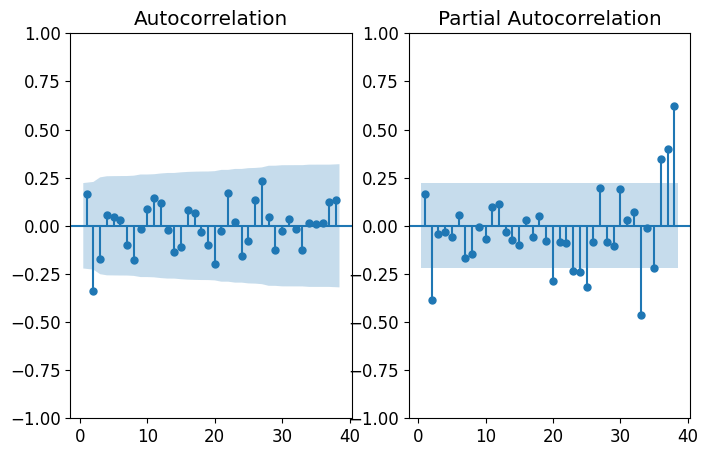

In [25]:
plot_acf_pacf(diff2_values, {'lags':38})

Se ven MUY similares entonces usaremos los mismos valores

In [26]:
# 1. Modelo de diferencia de primer orden
arima_model1 = ARIMA(scaled_data, order=(3, 1, 0))
model1 = arima_model1.fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                   80
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 154.942
Date:                Mon, 05 Feb 2024   AIC                           -301.883
Time:                        11:46:18   BIC                           -292.406
Sample:                             0   HQIC                          -298.086
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1055      0.110     10.039      0.000       0.890       1.321
ar.L2         -0.5783      0.140     -4.140      0.000      -0.852      -0.304
ar.L3          0.2639      0.107      2.464      0.0

Subio el log likelihood! Eso es muy bueno 👌

<Axes: >

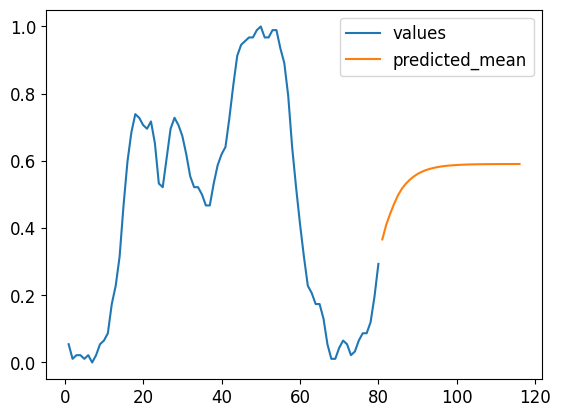

In [27]:
# Cómo realizar predicciones con el modelo ajustado
y_h = model1.predict(start=80, end=115, dynamic=False).to_frame()

ax = scaled_data.plot()

y_h.plot(ax=ax)

Se ve muy bien!

----
## 3️⃣

In [28]:
import requests
from io import BytesIO
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.seasonal import STL

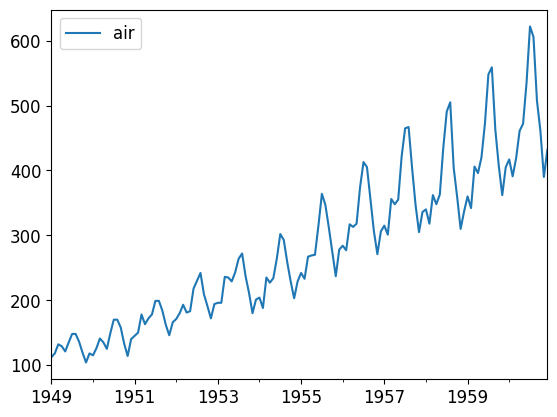

In [38]:
air2 = requests.get('https://www.stata-press.com/data/r12/air2.dta').content
data2 = pd.read_stata(BytesIO(air2))
data2['time'] = data2['time'].astype(int)
data2.index = pd.date_range(start=datetime(data2['time'][0], 1, 1), periods=len(data2), freq='MS')
data2.drop(columns=['time', 't'], inplace=True)
data2 = data2[["air"]]
data2.plot()
plt.show()

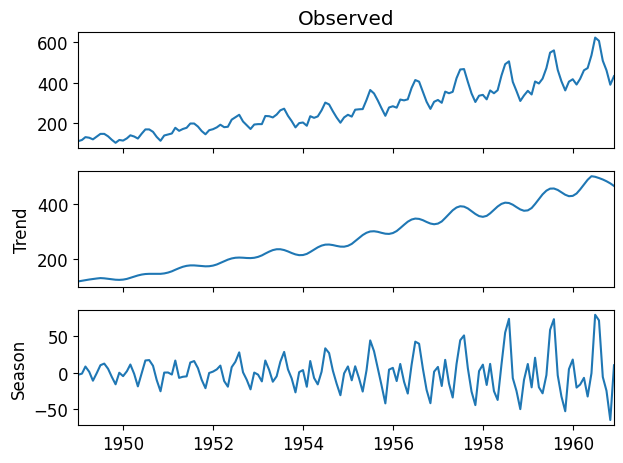

In [39]:
# Paquete para realizar descomposición de tendencia, estacionalidad y residuos
seasonal2 = STL(data2, period=4, seasonal_deg=2, seasonal=3)

# %timeit seasonal2.fit()
res = seasonal2.fit()
res.plot(resid=False, observed=True);

--------------------------
## 4️⃣

ARIMA

In [48]:
# 1. Modelo de diferencia de primer orden
arima_model1 = ARIMA(scaled_data, order=(3, 1, 0))
model1 = arima_model1.fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                   80
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 154.942
Date:                Tue, 07 Feb 2023   AIC                           -301.883
Time:                        15:52:27   BIC                           -292.406
Sample:                             0   HQIC                          -298.086
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1057      0.110     10.039      0.000       0.890       1.322
ar.L2         -0.5786      0.140     -4.142      0.000      -0.852      -0.305
ar.L3          0.2644      0.107      2.470      0.0

<AxesSubplot:>

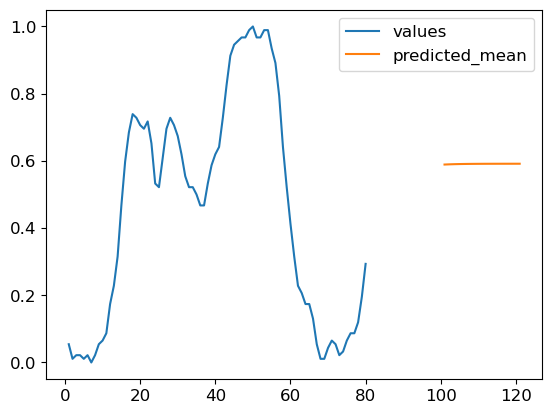

In [53]:
y_h = model1.predict(start=80, end=120, dynamic=False).to_frame()

ax = scaled_data.plot()

y_h.plot(ax=ax)

### Código de solución estudiante 2

## Enunciado de tarea.
> Para ejemplo estudiado en esta clase data WWWUsage.csv probar lo siguiente:
1. Encontrar el mejor modelo ARIMA usando los criterios de AIC, BIC y log-verosimilitud, justificando la estructura propuesta.
2. Analizar el efecto de normalizar la serie de tiempo, es decir usar MinMaxScaler para normalizar los datos. Posterior a esto, realizar el mismo procedimiento realizado en clase y encontrar el mejor modelo de ARIMA. Justifique todos los análisis, incluyendo los resultados de las gráficas de ACF y PAC.
3. Investigar la implementación y teoría de los modelos SARIMAX. Además de eso, generar un modelo de pronóstico usando SARIMAX, donde todo el procedimiento anteriormente descrito es implementado, para el siguiente conjunto de datos con estacionalidad.
4. Realizar una predicción de 20 unidades de tiempo en el futuro, tanto para el modelo ARIMA como SARIMA y reportar los resultados en una gráfica donde se puedan observar los datos reales y los datos predichos.

In [10]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

warnings.filterwarnings("ignore")
plt.rc("font", size=12)

In [23]:
data = pd.read_csv('WWWusage.csv', names=[ 'values'], header=0)
data.index = data.index.droplevel()
data.head()

,values
1,88
2,84
3,85
4,85
5,84


<Axes: >

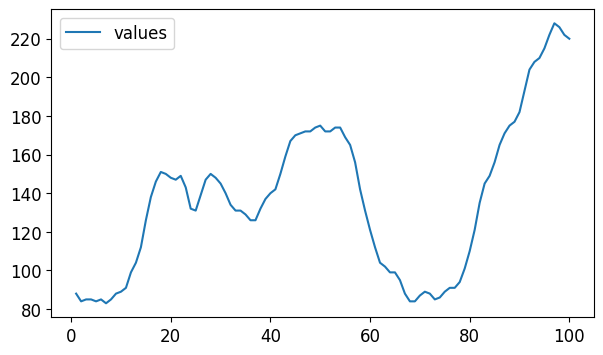

In [12]:
data.plot(figsize=(7,4))

- Observamos que tiene una tendencia más hacia la alza, por lo que podemos decir que no es estacionara, la varianza se ve que no es muy constante, la media no me queda muy clara.


# 1. Encontrar el mejor modelo ARIMA usando los criterios de AIC, BIC y log-verosimilitud, justificando la estructura propuesta.

Como no es tan claro, usaremos esta función proporcionada por el maestro para determinar si es o no es estacionaria para saber que hacer despues y continuar.

In [16]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    
    if (dftest[1] <= 0.05) & (dftest[4]['5%'] > dftest[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [17]:
adf_test(data)

Results of Dickey-Fuller Test:
Test Statistic                 -2.464240
p-value                         0.124419
#Lags Used                      3.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Non-stationary


- Comprobamos que la serieno es estacionaria, por lo que podemos hacer varias cosas. En este caso haremos la diferenciación de la serie

In [18]:
# Ilustración del método differencing con pandas
my_diferencia = pd.DataFrame()

my_diferencia['real'] = data
my_diferencia['1d'] = data.diff()
my_diferencia['2d'] = data.diff().diff()

my_diferencia

,real,1d,2d
1,88,NaN,NaN
2,84,-4.0,NaN
3,85,1.0,5.0
4,85,0.0,-1.0
5,84,-1.0,-1.0
...,...,...,...
96,222,7.0,2.0
97,228,6.0,-1.0
98,226,-2.0,-8.0
99,222,-4.0,-2.0


- Evaluamos la primera y la segunda derivada para saber si son o no estacionarias, ver si logramos convertirla

In [19]:
# Primera
diff1_values = data.diff().dropna()
print('ADF para derivada primer orden...\n')
adf_test(diff1_values)

ADF para derivada primer orden...

Results of Dickey-Fuller Test:
Test Statistic                 -2.722238
p-value                         0.070268
#Lags Used                      2.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Non-stationary


- En la primera nuestro p-value sigue siendo mayor que 0.05 por lo que aún nos dice que es no estacionaria

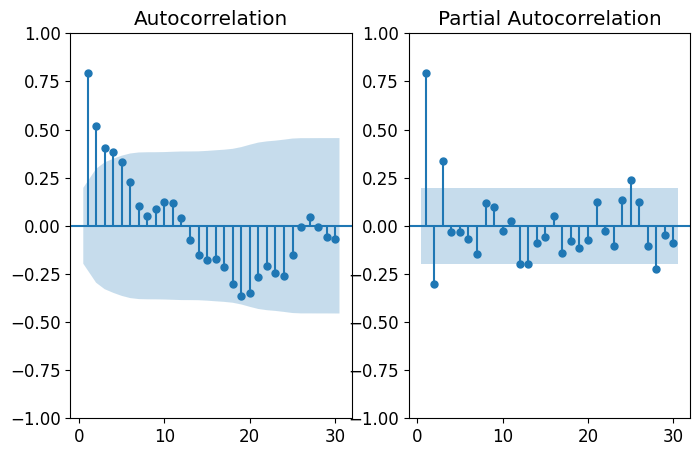

In [21]:
# 1. Graficar ACF y PACF
def plot_acf_pacf(data, kwargs=dict()):
    f = plt.figure(figsize=(8,5))

    ax1 = f.add_subplot(121)

    plot_acf(data, zero=False, ax=ax1, **kwargs)

    ax2 = f.add_subplot(122)
    plot_pacf(data, zero=False, ax=ax2, method='ols', **kwargs)

    plt.show()

plot_acf_pacf(diff1_values, {'lags':30})

- El modelo que nos podría funcionar aquí sería un ARIMA(p(AR), d(I), q(MA)) = **ARIMA(3, 1, 4)**
- Aunque observando bien, la parte de MA observamos como va descendiendo de una forma senoidail por lo que podría ser también un **ARIMA(3,1,0)** ya que no existe una media movil.

In [20]:
# Segunda, Segundo orden
diff2_values = data.diff().diff().dropna()

print('ADF para derivada segundo orden...\n')
adf_test(diff2_values)

ADF para derivada segundo orden...

Results of Dickey-Fuller Test:
Test Statistic                -9.929762e+00
p-value                        2.843429e-17
#Lags Used                     1.000000e+00
Number of Observations Used    9.600000e+01
Critical Value (1%)           -3.500379e+00
Critical Value (5%)           -2.892152e+00
Critical Value (10%)          -2.583100e+00
dtype: float64
Stationary


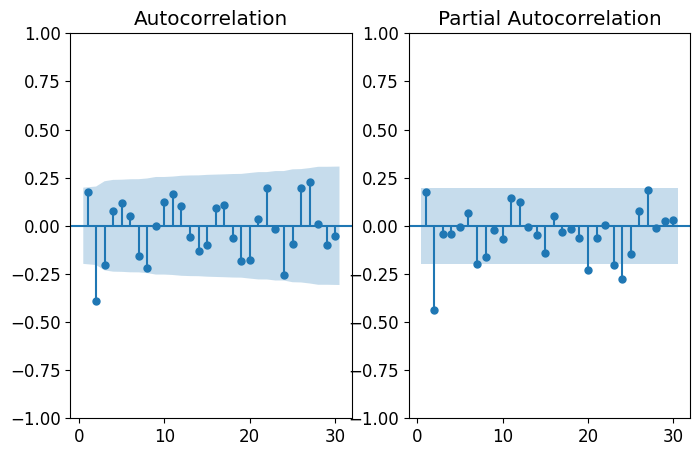

In [22]:
plot_acf_pacf(diff2_values, {'lags':30})

- Aquí no se observa en ninguna de las gráficas que se comporte de una forma senoidal por lo que podemos determinar que tiene ambos componentes, obteniendo un **ARIMA(p,d,q) = ARIMA(2, 2, 2)**

### Modelos

In [24]:
# 1. Modelo de diferencia de primer orden
arima_model1 = ARIMA(data, order=(3, 1, 4))
model1 = arima_model1.fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                  100
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -248.864
Date:                Mon, 05 Feb 2024   AIC                            513.728
Time:                        20:32:16   BIC                            534.489
Sample:                             0   HQIC                           522.128
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6158      0.148     10.943      0.000       1.326       1.905
ar.L2         -1.5358      0.174     -8.844      0.000      -1.876      -1.195
ar.L3          0.6233      0.139      4.491      0.0

In [26]:
# Primer orden 
arima_model1_1 = ARIMA(data, order=(3, 1, 0))
model1_1 = arima_model1_1.fit()
print(model1_1.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                  100
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -251.997
Date:                Mon, 05 Feb 2024   AIC                            511.995
Time:                        20:34:33   BIC                            522.375
Sample:                             0   HQIC                           516.195
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1513      0.103     11.214      0.000       0.950       1.353
ar.L2         -0.6612      0.134     -4.932      0.000      -0.924      -0.398
ar.L3          0.3407      0.094      3.641      0.0

In [27]:
# 2. Modelo de diferencia de segundo orden

# Basado en lo discutido anteriormente, necesitamos sólo considerar algunos términos AR y MA.
# Para ello definimos sus coeficientos cómo la especificación de polinomios

# Términos de AR
ar = (0, 1)  # (alpha1, alpha2)
# Términos de MA
ma = (0, 1)  # (beta1, beta2)

# Entonces el ar o el ma podrían ser en caso (0,0,1)? (no en este caso, uno hipotético)

arima_model2 = ARIMA(data, order=(ar, 2, ma))
model2 = arima_model2.fit()
print(model2.summary())

# ARIMA(2,2,2)

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                  100
Model:             ARIMA([2], 2, [2])   Log Likelihood                -256.198
Date:                Mon, 05 Feb 2024   AIC                            518.396
Time:                        20:42:54   BIC                            526.151
Sample:                             0   HQIC                           521.532
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L2         -0.2090      0.240     -0.870      0.384      -0.680       0.262
ma.L2         -0.2188      0.238     -0.918      0.359      -0.686       0.248
sigma2        10.8799      1.740      6.253      0.0

- Aunque el log likelihood es mayor en el modelo1 pasamos al modelo1_1 por la diferencia entre los AIC Y BIC que es mayor entre uno y el otro.

<Axes: >

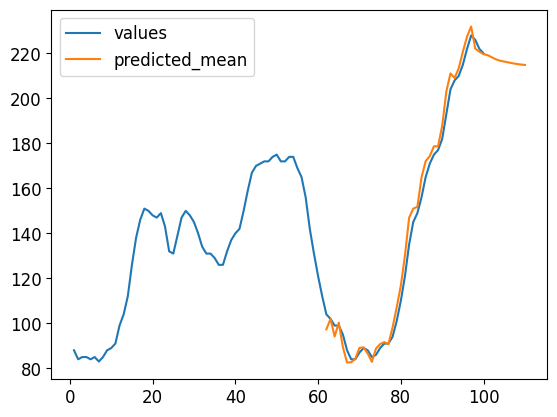

In [38]:
# Cómo realizar predicciones con el modelo ajustado
y_h = model1_1.predict(start=62, end=110, dynamic=False).to_frame()

ax = data.plot()

y_h.plot(ax=ax)

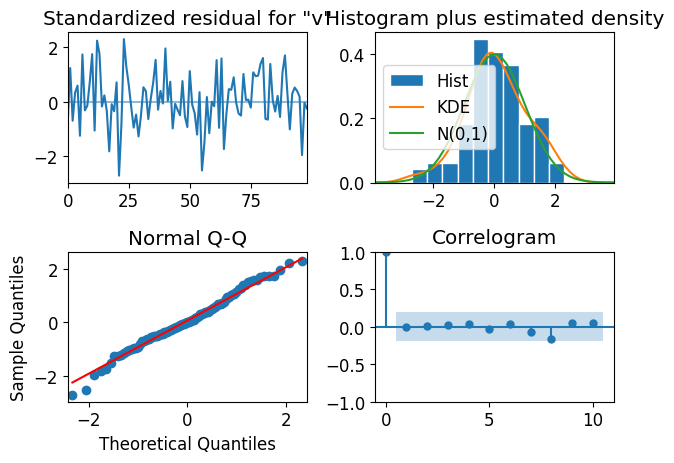

In [39]:
# Gráfico de los diagnósticos para los residuos
model1_1.plot_diagnostics()
plt.tight_layout();

# 2. Analizar el efecto de normalizar la serie de tiempo, es decir usar MinMaxScaler para normalizar los datos. Posterior a esto, realizar el mismo procedimiento realizado en clase y encontrar el mejor modelo de ARIMA. Justifique todos los análisis, incluyendo los resultados de las gráficas de ACF y PAC.

In [ ]:
# Necesitaremos las librerias para normalizar los datos

